## Ансамбли и полносвязные нейронные сети
В этом ноутбуке вам нужно обучить модели на датасете классификации из предыдущего ноутбука и сравнить результаты. Вам будет предоставлен baseline, на основе которого вы будете доделывать предсказывающие модели. Оценка лабы будет зависеть от ROC-AUC на тестовых данных по следующим критериям:
\
AUC - на тестовых данных
- $AUC \leq 0.76$ - 0 баллов
- $0.76 < AUC \leq 0.77$ - 2 балла
- $0.77 < AUC \leq 0.78$ - 4 балла
- $0.78 < AUC \leq 0.79$ - 6 баллов
- $0.79 < AUC \leq 0.80$ - 8 баллов
- $AUC > 0.80$ - 10 баллов


In [1]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import roc_auc_score, precision_score, recall_score, roc_curve, accuracy_score

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.model_selection import GridSearchCV

In [21]:
data = pd.read_csv('german.csv', sep=';')
print(data.head())

#X = data.iloc[:, 1:].to_numpy()

X = data.iloc[:, 1:].to_numpy()
y = data.iloc[:, 0].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=48)

   Creditability  Account_Balance  Duration_of_Credit_monthly  \
0              1                1                          18   
1              1                1                           9   
2              1                2                          12   
3              1                1                          12   
4              1                1                          12   

   Payment_Status_of_Previous_Credit  Purpose  Credit_Amount  \
0                                  4        2           1049   
1                                  4        0           2799   
2                                  2        9            841   
3                                  4        0           2122   
4                                  4        0           2171   

   Value_Savings_Stocks  Length_of_current_employment  Instalment_per_cent  \
0                     1                             2                    4   
1                     1                             3               

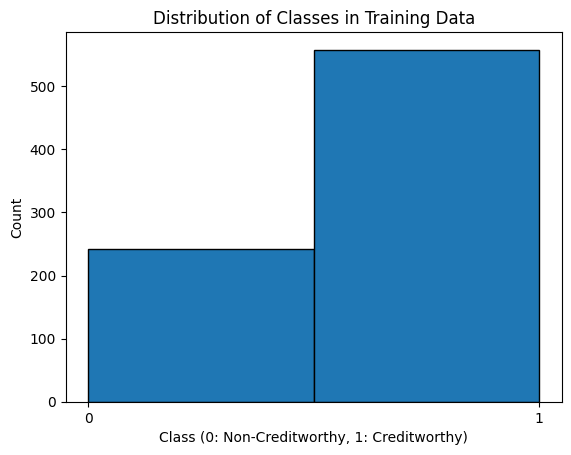

In [22]:
plt.hist(y_train, bins=2, edgecolor='k')
plt.xticks([0, 1])
plt.xlabel('Class (0: Non-Creditworthy, 1: Creditworthy)')
plt.ylabel('Count')
plt.title('Distribution of Classes in Training Data')
plt.show()

In [23]:
#rf_model = RandomForestClassifier()
#parametrs = {'criterion': ['entropy'], 'min_samples_leaf': [1,2,3,4,5],'min_samples_split': range(90,110), 'n_estimator':[10,20]}
#grid_search_cv_rf_model = GridSearchCV(rf_model, parametrs, cv=5)
#grid_search_cv_rf_model.fit(X_train, y_train)
#print(grid_search_cv_rf_model.best_params_)
#print(grid_search_cv_rf_model.best_score_)
#gb_model = GradientBoostingClassifier(random_state=42)
#param_grid = {'n_estimators':range(100, 500, 100),
#              'learning_rate': [0.1, 0.01],
#              'max_depth': range(2,20,5),
#              'min_samples_leaf': range(2,100,30),
#              'min_samples_split':range(3,100,30)
#             }
#grid_search = GridSearchCV(estimator=gb_model, param_grid = param_grid, cv=3)
#grid_search.fit(X_train, y_train)
#grid_search.best_params_
#best_score = grid_search.best_score_
#best_score
mlp_model = MLPClassifier(random_state=48)
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (200,)],
    'alpha': [0.001, 0.01, 0.1],
    'random_state': [42]
}
grid_search = GridSearchCV(estimator=mlp_model, param_grid = param_grid, cv=3)
grid_search.fit(X_train, y_train)
best_score = grid_search.best_score_
best_score

0.6962443562088744

In [24]:
grid_search.best_params_

{'alpha': 0.1, 'hidden_layer_sizes': (50,), 'random_state': 42}

In [28]:
# Обучение Random Forest
rf_model = RandomForestClassifier(max_depth=20,
  random_state=48,
  n_estimators=300,
  criterion='entropy',
  min_samples_split=21,
  min_samples_leaf = 1,
  max_features="log2",
  bootstrap=True,
  class_weight="balanced")
rf_model.fit(X_train, y_train)

# Прогноз на тестовых данных
rf_prod = rf_model.predict_proba(X_test)[:, 1]
rf_pred = rf_model.predict(X_test)
# Расчет метрик для Random Forest
rf_roc_auc = roc_auc_score(y_test, rf_prod)
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred)
rf_recall = recall_score(y_test, rf_pred)

print("Random Forest метрики:")
print(f"ROC AUC: {rf_roc_auc:.4f}")
print(f"Accuracy: {rf_accuracy:.2f}")
print(f"Precision: {rf_precision:.2f}")
print(f"Recall: {rf_recall:.2f}")

# Обучение Gradient Boosting
gb_model = GradientBoostingClassifier(n_estimators=300, 
                                      learning_rate=0.01,
                                      max_depth=105,
                                      min_samples_leaf = 10,
                                      min_samples_split = 30,
                                      random_state=42)
gb_model.fit(X_train, y_train)

# Прогноз на тестовых данных
gb_prod = rf_model.predict_proba(X_test)[:, 1]
gb_pred = rf_model.predict(X_test)

# Расчет метрик для Gradient Boosting
gb_roc_auc = roc_auc_score(y_test, gb_pred)
gb_accuracy = accuracy_score(y_test, gb_pred)
gb_precision = precision_score(y_test, gb_pred)
gb_recall = recall_score(y_test, gb_pred)

print("\nGradient Boosting метрики:")
print(f"ROC AUC: {gb_roc_auc:.4f}")
print(f"Accuracy: {gb_accuracy:.2f}")
print(f"Precision: {gb_precision:.2f}")
print(f"Recall: {gb_recall:.2f}")

Random Forest метрики:
ROC AUC: 0.8222
Accuracy: 0.80
Precision: 0.84
Recall: 0.87

Gradient Boosting метрики:
ROC AUC: 0.7383
Accuracy: 0.80
Precision: 0.84
Recall: 0.87


In [36]:
# Обучение MLP (Multi-Layer Perceptron) нейронной сети
#mlp_model = MLPClassifier(hidden_layer_sizes=(50,23),
#                        max_iter = 150,
#                        activation = 'tanh',
#                        solver = 'adam',
#                        random_state=48,
#                        alpha=0.1,
#                        learning_rate = 'invscaling')
mlp_model = MLPClassifier(hidden_layer_sizes=(50,24),
                        max_iter = 100,
                        activation =  'relu',
                        solver = 'adam',
                        random_state=48,
                        alpha=0.01,
                        learning_rate = 'invscaling')
mlp_model.fit(X_train, y_train)

# Прогноз на тестовых данных
mlp_prod = rf_model.predict_proba(X_test)[:, 1]
mlp_pred = rf_model.predict(X_test)

# Расчет метрик для MLP нейронной сети
mlp_roc_auc = roc_auc_score(y_test, mlp_pred)
mlp_accuracy = accuracy_score(y_test, mlp_pred)
mlp_precision = precision_score(y_test, mlp_pred)
mlp_recall = recall_score(y_test, mlp_pred)

print("\nMLP (Neural Network) метрики:")
print(f"ROC AUC: {mlp_roc_auc:.2f}")
print(f"Accuracy: {mlp_accuracy:.2f}")
print(f"Precision: {mlp_precision:.2f}")
print(f"Recall: {mlp_recall:.2f}")


MLP (Neural Network) метрики:
ROC AUC: 0.74
Accuracy: 0.80
Precision: 0.84
Recall: 0.87


## Экспериментируйте
Для получения лучшего качества придется поэкспериментировать. Подсказка: попробуйте оптимизировать гиперпараметры модели